# Simple Neural Network

Simple Red Neuronal (Perceptrón) para la materia Tecnologías Exponenciales - TIC

Inspirado en https://github.com/jonasbostoen/simple-neural-network

### Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [ ]:
np.random.seed(1)

### Funciones

In [ ]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)


Sigmoid Function
$$\operatorname{f}(x)=\frac{1}{1+e^{(-x)}}$$

Sigmoid Derivative Function
$$\operatorname{f'}(x)=x \times (1-x)$$

#### Visualización Función Sigmoide

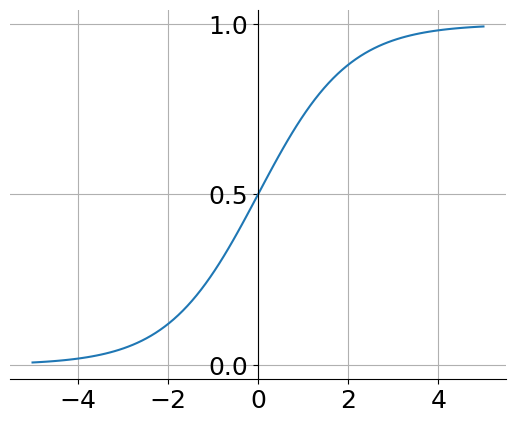

In [ ]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

## Setup

### Values

#### Training Values

###Problema planteado:

El problema planteado es el siguiente: La red neuronal deberia predecir si una persona es alegre, no alegre, o intermedio por los diferentes tipos de musica que escucha. Cada uno de los arrays representa un estilo de musica, y los index de cada uno de estos arrays, caracteristicas de este estilo.

- [0]: R&B
- [1]: Trap
- [2]: Reguetton
- [3]: Sentimental
- [4]: Rock
- [5]: Lento
- [6]: Bachata

 Ahora representaremos los outputs esperados para los diferentes tipos de personalidades:

- Alegre
- No Alegre
- Intermedio


In [ ]:


training_inputs = np.array([
    [0,0,1,1,0,1,1],
    [1,1,0,0,1,0,0],
    [1,0,1,0,0,1,0],
    [0,1,1,0,1,1,1],
    [1,0,0,1,1,0,0],
    [0,0,0,1,1,0,1],
    [1,1,1,1,0,0,0]
])


training_outputs = np.array([
    [1,1,1,0,1,0,1],
    [0,0,0,1,0,1,0],
    [1,1,0,0,0,0,1]
]).T

display(training_inputs)
display(training_outputs)

array([[0, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 0]])

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 1]])

In [ ]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

0,0,1,1,0,1,1,1,0,1
1,1,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,1,0,0
0,1,1,0,1,1,1,0,1,0
1,0,0,1,1,0,0,1,0,0
0,0,0,1,1,0,1,0,1,0
1,1,1,1,0,0,0,1,0,1


#### Synaptic weights

In [ ]:
n = training_inputs.shape[1]
synaptic_weights = 2 + np.random.random((7, 3)) - 1

synaptic_weights

array([[1.417022  , 1.72032449, 1.00011437],
       [1.30233257, 1.14675589, 1.09233859],
       [1.18626021, 1.34556073, 1.39676747],
       [1.53881673, 1.41919451, 1.6852195 ],
       [1.20445225, 1.87811744, 1.02738759],
       [1.67046751, 1.4173048 , 1.55868983],
       [1.14038694, 1.19810149, 1.80074457]])

## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [ ]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

In [ ]:
# 50000 epochs
for iteration in range(50000):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights)

    # Calculo el error
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [ ]:

print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[ 10.76365122 -10.8408156    3.81133092]
 [  0.61011979  -0.53554187  19.45166853]
 [  2.25014728  -2.81764871  -4.20222566]
 [  5.39564078  -5.31847062  10.0622877 ]
 [ -5.97732794   5.97991629 -18.73005713]
 [  2.72058579  -2.15049169  -4.62730893]
 [ -5.03719436   4.95743355   3.34068036]]
Outputs after training: 
[[9.95175295e-01 4.82471444e-03 9.89782903e-01]
 [9.95487732e-01 4.51227626e-03 9.89365202e-01]
 [9.99999853e-01 1.36229185e-07 6.57297981e-03]
 [4.34809748e-03 9.95651894e-01 8.43217510e-03]
 [9.99962154e-01 3.79443840e-05 7.71818175e-03]
 [3.61561405e-03 9.96384378e-01 4.83475376e-03]
 [9.99999995e-01 3.35625318e-09 1.00000000e+00]]


## Eval

In [ ]:
table(training_values)

0,0,1,1,0,1,1,1,0,1
1,1,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,1,0,0
0,1,1,0,1,1,1,0,1,0
1,0,0,1,1,0,0,1,0,0
0,0,0,1,1,0,1,0,1,0
1,1,1,1,0,0,0,1,0,1


In [ ]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [ ]:
a = 1 #@param {type:"integer"}
b = 0 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
d = 0 #@param {type:"integer"}
e = 1 #@param {type:"integer"}
f = 0 #@param {type:"integer"}
g = 1 #@param {type:"integer"}



input_layer = np.array([a, b, c, d, e, f, g])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = (res >= thresh).astype(int)

large(out)

0.8807210614868255

#Conceptos aprendidos durante esta etapa del año los cuales nos van a ser de gran utilidad para futuros proyectos tanto personales, como academicos:

- Back Propagation
- Forward propagation
- Gradient Descent

Por encima de esto, marcaremos ejemplos los cuales fueron visualizados en el codigo de arriba en los cuales resaltaremos la utilizacion de las siguientes cosas:

(Estructura de la Red, Función de activación)

## Back Propagation

El back propagation es un algoritmo utilizado para disminuir la distancia entre el output deseado por el creador del modelo, y el output que de vuelve el modelo en si, a traves del error, modifica los pesos declarados anteriormente, y los va mejorando hasta llegar al mejor resultado, o sea, la menor distancia posible. Para que esta distancia se acorte, el back propagation se divide en diferentes pasos:

- Elección de entrada y salida: Se elige exactamente los valores de entrada, y de salida deseados por el creador
- Se configuracion de hiperparametros: Una vez que tenemos los valores de entrada y de salida, se configuran los hiperparametros, ya sea manualmente, o a traves de diferentes funciones dadas por diferentes librerias de python.
- Se calcula el error: Se ve cuanto es el error total a partir de la poner en practica el modelo, y viendo el error que este devuelve.
- Minimizamos los errores: A partir de los diferentes errores que se encontraron, el algoritmo en si, minimiza estos mismos en el conjunto de la red neuronal.
- Se actualizan los parametros dados anteriormente para poder "aprender del error"
- Se predice con el nuevo modelo: Al haber optimizado los errores anteriormente recividos, el modelo ya esta mejorado y con menor rango de error que cuando emepzo, por lo que ahora se prueba con las entradas de prueba adecuadas y si el error sigue siendo muy alto, comenzamos todo el proceso de vuelta.

## Forward propagation

El forward propagation se basa en que los vectores que fueron ingresados en los inputs layers, vayan pasando de capa en capa hacia adelante, por eso FORWARD.

- Primero se los ingresa en los inputs layers
- Se dirigen a las capas ocultas, en las cuales se les aplican las diferentes funciones de activacion dependiendo del resultado buscado.
- Para luego llegar a las capas de salida, donde se produce la salida final de la red neuronal, ya con los datos de entrada originales, totalmente procesados.

##Gradient Descent

El gradient descent es un algoritmo el cual tiene como objetivo disminuir o mas bien minimizar la cantidad de perdida o LOSS que tiene una red neuronal. El objetivo es encontrar los hiperparametros adecuados que minimicen el LOSS de la red.

Esto lo logra a traves de muchas iteraciones, ya que mientras mas iteraciones realiza, mas pasos puede hacer y mas analisis puede realizar.

El proceso de como funciona el Gradient Descent es que se pone un punto de partida, el cual puede ser random, o ingresado por el usuario, y luego se van haciendo pasos, para adelante principalmente, los cuales buscan encontrar una zona en la cual se encuentre menor cantidad de perdida.

Para poder entenderlo mejor, aqui ponemos una imagen que lo explica bastante bien:

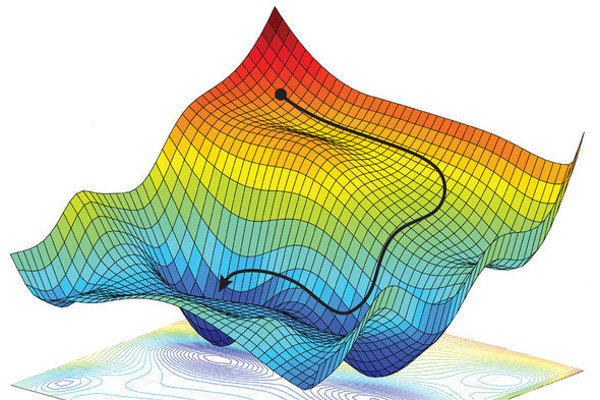


Como podemos ver en la imagen de arriba, se elige un punto random en un grafico, para luego empezar a dar pasos los cuales tienen el objetivo de encontrar el punto con menor cantidad de perdida, el cual en el mejor de los casos, se encuentra.

##Estructura de la red

En el codigo de arriba, la estructura de la red son los datos de entrada los cuales fueron dados manualmente por nosotros, Los pesos, los cuales fueron realizados a traves de numeros randoms en este caso, los cuales luego fueron ajustados a traves de los diferentes errores presentados y finalmente los outputs los cuales fueron tambien, agregados manualmente.

##Función de activación

En nuestro caso decidimos seguir utilizando la funcion de activacion SIGMOIDE ya que nos permite tener 3 valores, 0 - 1 - 0.5. Y en nuestro caso encajaba perfecto, por lo que no lo modificamos